# Linear Regression Implementation from Scratch

(i) tensors for data storage and linear algebra;

(ii) automatic differentiation for calculating gradients.

In [63]:
%matplotlib inline 
import torch
import random 
# from d2l import torch as d2l
# or 
import matplotlib.pyplot as plt

## Generatingg the Dataset

**$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$**

For convenience we assume that $\epsilon$ is drawn 
from a normal distribution with mean $\mu= 0$ 
and standard deviation $\sigma = 0.01$.
Set the true parameters to $\mathbf{w} = [2, -3.4]^\top$ and $b = 4.2$.

In [51]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    # add noise
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1)) # convert y to a column vector

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [52]:
# view the dataset
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([ 0.4047, -1.0739]) 
label: tensor([8.6685])


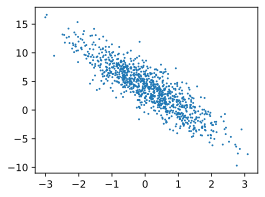

In [64]:
# plot the dataset

# d2l.set_figsize()
# # .numpy(): convert torch Tensor to Numpy array
# d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1); 

# or
plt.figure(figsize = (4, 3))
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

## Reading the Dataset

In [54]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # shuffle the data index
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.1793,  0.3918],
        [-0.0967, -0.6379],
        [ 1.7082,  0.5216],
        [-0.7813,  0.1425],
        [ 1.6938, -1.5993],
        [-0.8505, -0.2435],
        [-0.5511, -1.0422],
        [-1.5891, -0.1012],
        [-0.5656, -0.4711],
        [ 0.4467,  0.4506]]) 
 tensor([[ 2.5172],
        [ 6.1763],
        [ 5.8337],
        [ 2.1487],
        [13.0208],
        [ 3.3521],
        [ 6.6483],
        [ 1.3567],
        [ 4.6854],
        [ 3.5647]])


## Initializing Model Parameters

In [55]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## Defining the Model

In [56]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

## Defining the Loss Function

In [57]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## Defining the Optimization Algorithm

Use `minibatch SGD`. The loss is computed as an average over the minibatch.

In [58]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size # NOTE: param = param - lr * param.grad / batch_size doesn't update parameters outside the function
            param.grad.zero_()

## Training

In [59]:
lr = 0.03 # learning rate
batch_size = 10
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size) # update parameters
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        # print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        # or
        print('epoch {}, loss {:.6f}'.format(epoch + 1, float(train_l.mean())))

epoch 1, loss 0.051125
epoch 2, loss 0.000220
epoch 3, loss 0.000052
